<h1>Grade Analysis</h1>

Welcome to my first data analysis project! I'm quite new to the field, so don't expect anything too grand. 

The idea for this project stemmed from a csv that my professor sent out in my intro to data structures for Python course. It was a csv full of everyone's grades with a secret code that was based on your student ID, so it was anonymous.

I want to take a look at this data, which is the accumulation of a quarter's worth of work by an entire class, to see if I can find anything interesting. Maybe drop rates, signs of exhaustion, the time that the midterm was, or anything that could be revealed by the grades students received as the quarter continued.

So, without any further ado, let's get into it!

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h2> The Data </h2>

This is the csv that was sent out to all students. As you can see, it contains a secret code for each student, each person's grades for homeworks 1-8, lab1-9, and the midterm, as well as totals. These values are all represented as proportions, so we do not have to worry about any strange weights in the event that some assignments were worth more points than others.

In [166]:
grades = pd.read_csv("Final_Secret_Grades.csv")
grades.head()

,Secrete Code,hw1_score,hw2_score,hw3_score,hw4_score,hw5_score,hw6_score,hw7_score,hw8_score,lab01_score,lab02_score,...,lab04_score,lab05_score,lab07_score,lab08_score,lab09_score,lab6_score,Midterm,Participation,Lab_Total,HW_Total,Weighted_Total
0,zvodl,0.915,0.68,0.975,0.83,1.00,0.77,1.00,0.96,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.4250,1.00,0.986111,0.921429,0.820040
1,zhnzdq,0.900,0.91,0.980,0.98,0.97,1.00,1.00,0.93,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.8500,1.00,1.000000,0.967143,0.948810
2,b2pd,0.650,0.38,0.860,0.80,0.00,0.86,0.96,0.00,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.6125,0.88,0.972222,0.644286,0.737966
3,vwdnhjdp,0.775,0.48,0.810,0.91,0.00,0.00,0.00,0.00,0.4,0.454545,...,0.1,0.0,0.0,0.0,0.0,0.0,0.3875,0.52,0.119949,0.425000,0.347279
4,bzfkhq,0.870,0.38,0.740,0.89,0.70,0.00,0.00,0.00,1.0,1.000000,...,1.0,0.4,0.0,0.0,0.0,0.0,0.5875,0.00,0.475000,0.511429,0.478720


<h2> Cleanup </h2>

The first step for me is to drop the secret code, as that is not pertinent information. I also want to clean up the column names a bit, we know that each column is a score, so there's no point keeping that extraneous information on the end of the string, especially if we want to display it later.

In [167]:
grades.drop("Secrete Code", axis=1, inplace=True)
grades.head()

,hw1_score,hw2_score,hw3_score,hw4_score,hw5_score,hw6_score,hw7_score,hw8_score,lab01_score,lab02_score,lab03_score,lab04_score,lab05_score,lab07_score,lab08_score,lab09_score,lab6_score,Midterm,Participation,Lab_Total,HW_Total,Weighted_Total
0,0.915,0.68,0.975,0.83,1.00,0.77,1.00,0.96,1.0,1.000000,0.875,1.0,1.0,1.0,1.0,1.0,1.0,0.4250,1.00,0.986111,0.921429,0.820040
1,0.900,0.91,0.980,0.98,0.97,1.00,1.00,0.93,1.0,1.000000,1.000,1.0,1.0,1.0,1.0,1.0,1.0,0.8500,1.00,1.000000,0.967143,0.948810
2,0.650,0.38,0.860,0.80,0.00,0.86,0.96,0.00,1.0,1.000000,0.750,1.0,1.0,1.0,1.0,1.0,1.0,0.6125,0.88,0.972222,0.644286,0.737966
3,0.775,0.48,0.810,0.91,0.00,0.00,0.00,0.00,0.4,0.454545,0.125,0.1,0.0,0.0,0.0,0.0,0.0,0.3875,0.52,0.119949,0.425000,0.347279
4,0.870,0.38,0.740,0.89,0.70,0.00,0.00,0.00,1.0,1.000000,0.875,1.0,0.4,0.0,0.0,0.0,0.0,0.5875,0.00,0.475000,0.511429,0.478720


In [168]:
# Drop _score and _Total
for i in list(grades.columns):
    if i.count("_score"): 
        grades[i.strip("_score")] = grades[i]
        grades.drop(i, axis=1, inplace=True)
    elif i.count("_Total"):
        grades[i.strip("_Total")] = grades[i]
        grades.drop(i, axis=1, inplace=True)

# Move the Midterm and Participation columns back to the end.
temp_mid, temp_part = grades['Midterm'], grades['Participation']
grades.drop(['Midterm', 'Participation'], axis=1, inplace=True)
grades['Midterm'], grades['Participation'] = temp_mid, temp_part

# Match naming format.
grades['lab06'] = grades['lab6']
grades.drop('lab6', axis=1, inplace=True)

# Lists of each label subset.
LAB_LIST = sorted([i for i in grades if i.count('lab')])
HW_LIST = [i for i in grades if i.count("hw")]
MISC_LIST = [i for i in grades if not (i.count("hw") or i.count("lab"))]

# Count of each label subset (excluding miscellaneous).
NUM_LABS = len(LAB_LIST)
NUM_HW = len(HW_LIST)

def order_df():
    """This function returns a list comprehension that will order the columns sequentially form
    labs, to homeworks, to miscellaneous."""
    return LAB_LIST + HW_LIST + MISC_LIST

grades = grades[order_df()]
grades.head()

,lab01,lab02,lab03,lab04,lab05,lab06,lab07,lab08,lab09,hw1,hw2,hw3,hw4,hw5,hw6,hw7,hw8,Lab,HW,Weighted,Midterm,Participation
0,1.0,1.000000,0.875,1.0,1.0,1.0,1.0,1.0,1.0,0.915,0.68,0.975,0.83,1.00,0.77,1.00,0.96,0.986111,0.921429,0.820040,0.4250,1.00
1,1.0,1.000000,1.000,1.0,1.0,1.0,1.0,1.0,1.0,0.900,0.91,0.980,0.98,0.97,1.00,1.00,0.93,1.000000,0.967143,0.948810,0.8500,1.00
2,1.0,1.000000,0.750,1.0,1.0,1.0,1.0,1.0,1.0,0.650,0.38,0.860,0.80,0.00,0.86,0.96,0.00,0.972222,0.644286,0.737966,0.6125,0.88
3,0.4,0.454545,0.125,0.1,0.0,0.0,0.0,0.0,0.0,0.775,0.48,0.810,0.91,0.00,0.00,0.00,0.00,0.119949,0.425000,0.347279,0.3875,0.52
4,1.0,1.000000,0.875,1.0,0.4,0.0,0.0,0.0,0.0,0.870,0.38,0.740,0.89,0.70,0.00,0.00,0.00,0.475000,0.511429,0.478720,0.5875,0.00


<h2> Preparation </h2>

Now that I've cleaned the data, I can now extract anything I want from the DataFrame. My current plan is to pull out some averages and interpret those, as well as some counts as to how many people turned in an assignment or not, based on the number of 0s received.

In [176]:
averages = {i: round(np.mean(grades[i]), 2) for i in grades}
averages

{'HW': 0.74,
 'Lab': 0.82,
 'Midterm': 0.66,
 'Participation': 0.76,
 'Weighted': 0.74,
 'hw1': 0.74,
 'hw2': 0.63,
 'hw3': 0.75,
 'hw4': 0.75,
 'hw5': 0.73,
 'hw6': 0.76,
 'hw7': 0.66,
 'hw8': 0.57,
 'lab01': 0.83,
 'lab02': 0.92,
 'lab03': 0.83,
 'lab04': 0.85,
 'lab05': 0.8,
 'lab06': 0.85,
 'lab07': 0.83,
 'lab08': 0.8,
 'lab09': 0.7}

In [217]:
# Lab and Homework average DataFrame creation.
lab_averages = pd.DataFrame([averages[i] * 100 for i in LAB_LIST])
hw_averages = pd.DataFrame([averages[i] * 100 for i in HW_LIST])

# Have indexing start at 1 for DataFrame
lab_averages.index = np.arange(1, len(LAB_LIST) + 1)
hw_averages.index = np.arange(1, len(HW_LIST) + 1)

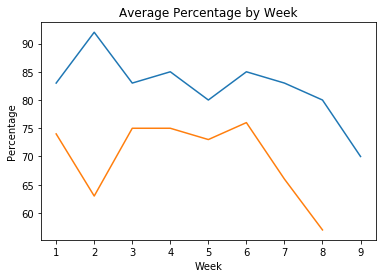

In [218]:
# Lab and Homework plot.
plt.plot(lab_averages)
plt.plot(hw_averages)
plt.title("Average Percentage by Week")
plt.xlabel("Week")
plt.ylabel("Percentage")
plt.show()

This data is from Spring Quarter, 2018. Some important dates from the quarter were:
<li>The drop deadlines (Week 4 without a Withdrawal, Week 9 with)</li>
<li>The midterm date, April 30, Week 5</li>
<li>The midterm grade release date, May 2, Week 5</li>

From this plot alone, we can make some speculations. 

Firstly, we can see that there was a slight dip in homework and lab grade averages around Week 5. This is likely due to the midterm, which caused people to take time away from working on the labs and homework assignments, and instead focus on studying. The week 4 grades and Week 6 grades for both labs and homeworks are quite similar, so having an exam during Week 5 could definitely be a factor in this dip.

Secondly, we can see a massive drop in homework grades after Week 6, continuing until the end of the data I have. Lab grades have a gradual dip after Week 6, only having a drop like that seen in homework grades after Week 8.